In [2]:
#Bibliotecas utilizadas no projeto de classificação de sementes de abobora

import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras import metrics
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.metrics import Precision, Recall
from tqdm.keras import TqdmCallback
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

2024-06-10 20:32:11.261474: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-10 20:32:11.264560: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-10 20:32:11.302753: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-10 20:32:13.754866: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#Carregando o dataset
sementes_aboboras = pd.read_excel('SementesAbobora.xlsx')
sementes_aboboras.head()

,Area,Perímetro,Maior_Eixo_Comprimento,Comprimento_Eixo_Menor,Área_Convexa,Equiv_Diâmetro,Excentricidade,Solidez,Extensão,Redondeza,Proporcao,Compacidade,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,(A) Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,(A) Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,(A) Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,(A) Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,(A) Çerçevelik


In [4]:
#Randomizando a ordem das sementes dos elementos do dataset
df = shuffle(sementes_aboboras)
df.head()

,Area,Perímetro,Maior_Eixo_Comprimento,Comprimento_Eixo_Menor,Área_Convexa,Equiv_Diâmetro,Excentricidade,Solidez,Extensão,Redondeza,Proporcao,Compacidade,Class
1516,86589,1221.667,510.8797,216.3206,87440,332.0370,0.9059,0.9903,0.7396,0.7291,2.3617,0.6499,(B) Ürgüp Sivrisi
2263,85617,1237.638,537.7672,203.0267,86437,330.1681,0.9260,0.9905,0.7202,0.7024,2.6488,0.6140,(B) Ürgüp Sivrisi
1432,77538,1210.669,526.9045,187.9819,78333,314.2045,0.9342,0.9899,0.5362,0.6648,2.8030,0.5963,(B) Ürgüp Sivrisi
1898,76580,1189.760,522.8475,186.9972,77235,312.2574,0.9339,0.9915,0.7349,0.6798,2.7960,0.5972,(B) Ürgüp Sivrisi
2376,86036,1211.072,501.7878,220.4258,87340,330.9750,0.8983,0.9851,0.5978,0.7371,2.2764,0.6596,(B) Ürgüp Sivrisi


In [5]:
#Verificando as colunas do nosso dataset
df.columns

Index(['Area', 'Perímetro', 'Maior_Eixo_Comprimento', 'Comprimento_Eixo_Menor',
       'Área_Convexa', 'Equiv_Diâmetro', 'Excentricidade', 'Solidez',
       'Extensão', 'Redondeza', 'Proporcao', 'Compacidade', 'Class'],
      dtype='object')

In [6]:
#Realizando uma conta de valores únicos na coluna Class
df['Class'].value_counts()

Class
(A) Çerçevelik       1300
(B) Ürgüp Sivrisi    1200
Name: count, dtype: int64

In [7]:
#Verificando os tipos de dados do dataset
df.dtypes

Area                        int64
Perímetro                 float64
Maior_Eixo_Comprimento    float64
Comprimento_Eixo_Menor    float64
Área_Convexa                int64
Equiv_Diâmetro            float64
Excentricidade            float64
Solidez                   float64
Extensão                  float64
Redondeza                 float64
Proporcao                 float64
Compacidade               float64
Class                      object
dtype: object

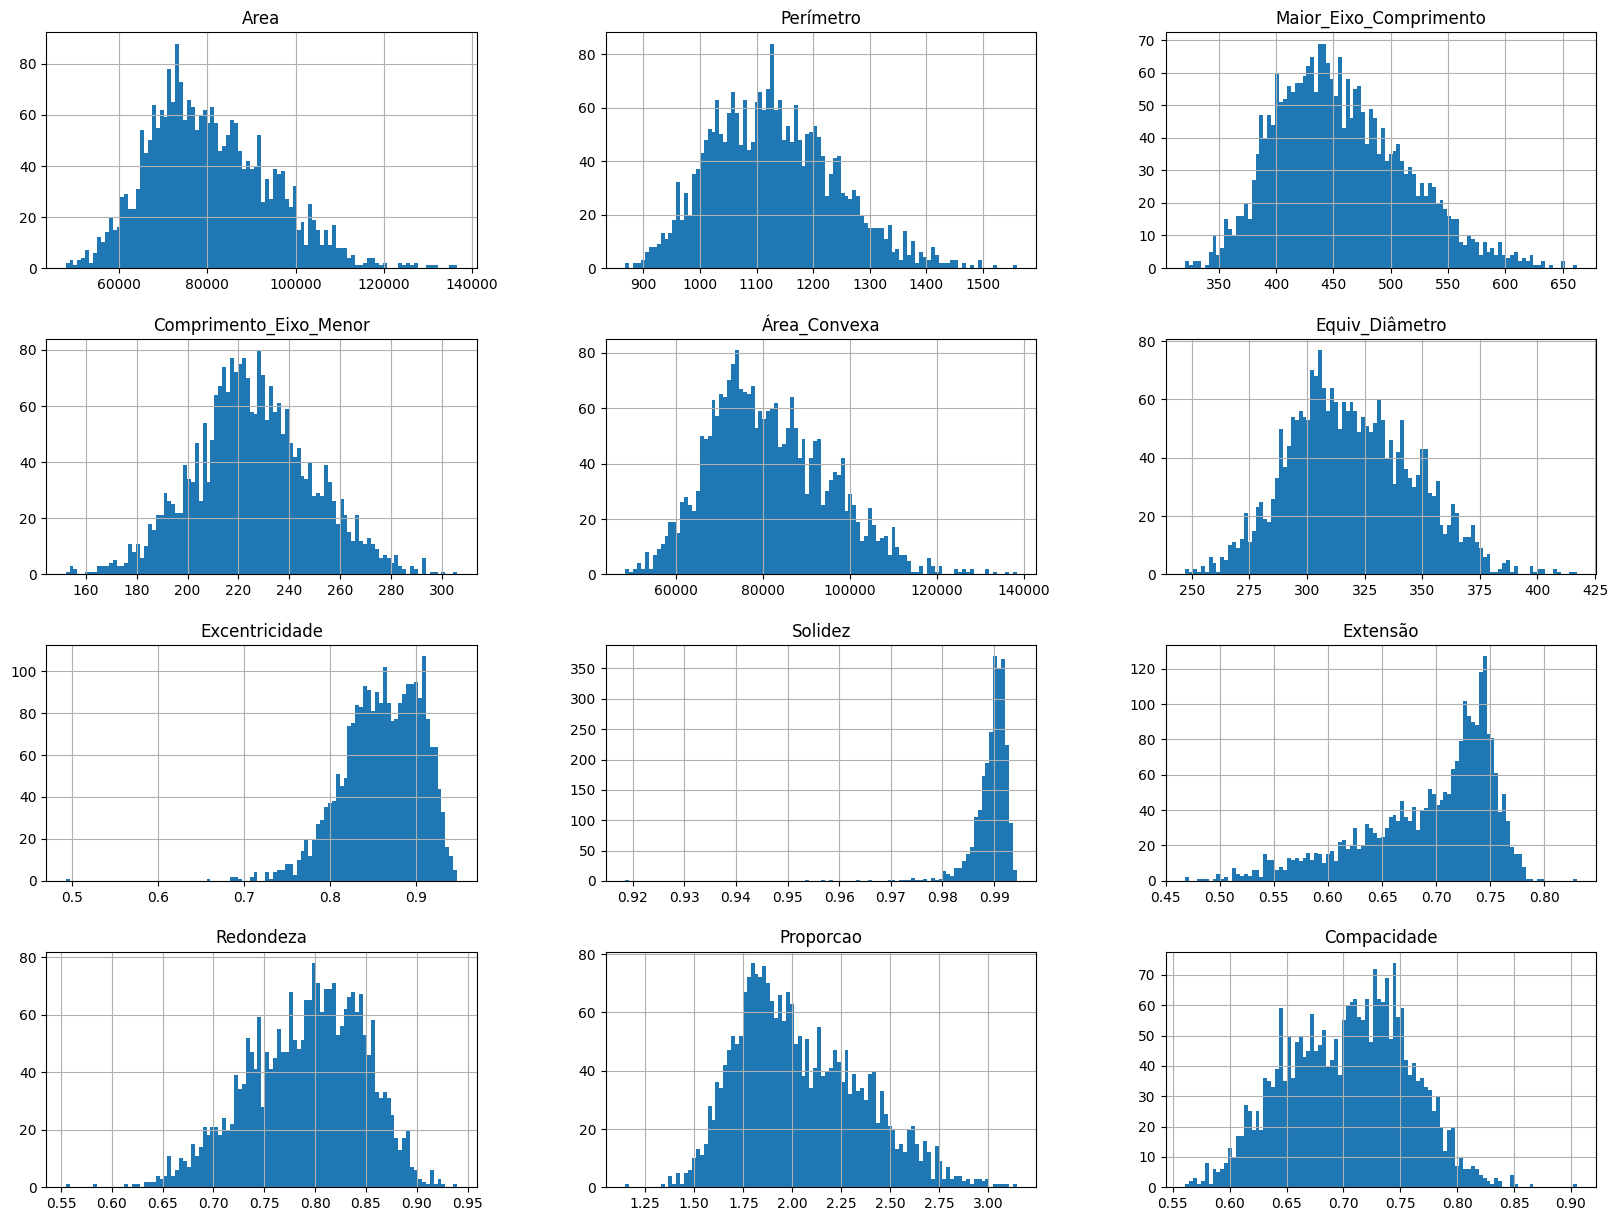

In [8]:
#Criando um gráfico de histogramadas de todas colunas numéricas do dataset
df.hist(bins=100, figsize=(20,15))
plt.show()

<Axes: >

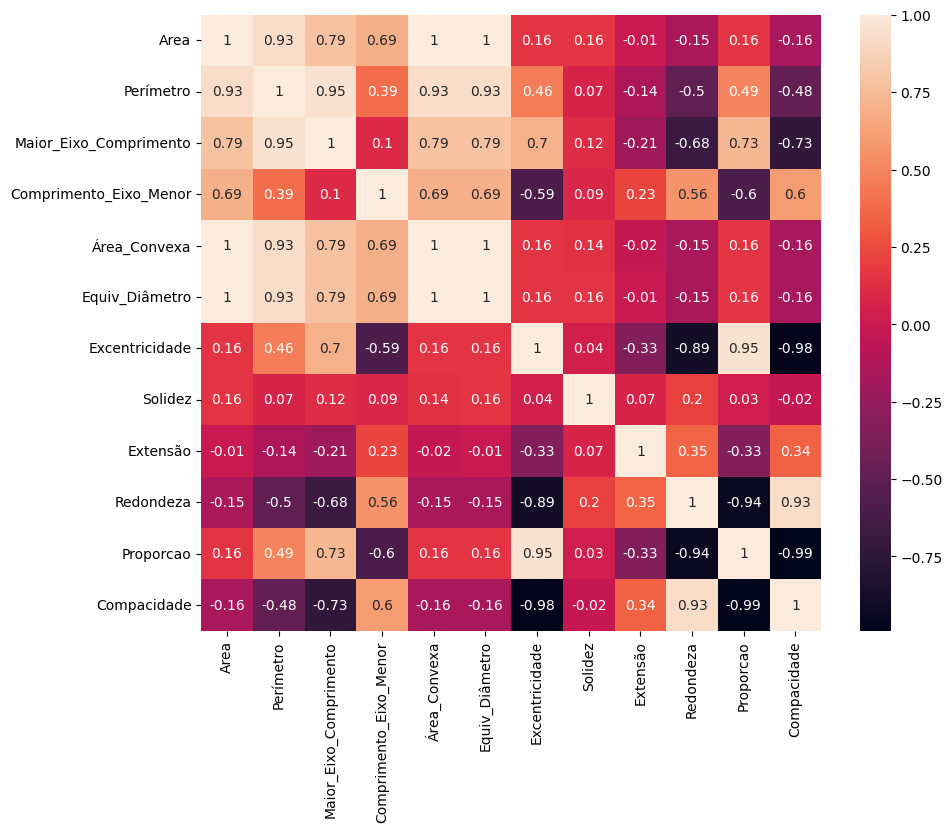

In [9]:
#Verificando a correlação entre as colunas numéricas do dataset
df_numeric = df.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr().round(2)

#Criando um gráfico de calor para visualizar a correlação entre as colunas numéricas
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, ax=ax)

In [10]:
#Convertendo as categorias de texto da coluna Class em números
le = LabelEncoder()
df.Class = le.fit_transform(df.Class)
set(df.Class)

{0, 1}

In [11]:
#Separando os dados de entrada e saida em X e y
X = df[['Area', 'Perímetro', 'Maior_Eixo_Comprimento', 'Comprimento_Eixo_Menor',
       'Área_Convexa', 'Equiv_Diâmetro', 'Excentricidade', 'Solidez',
       'Extensão', 'Redondeza', 'Proporcao', 'Compacidade']]
y = df['Class']

In [12]:

#Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
#Normalizando os dados de treinamento e teste
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

StandardScaler()

In [14]:
#Normalizando os dados de treinamento e teste
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train.shape

(2000, 12)

In [16]:
#Verificando o total de linha e colunas do dataset de treinamento
X_test.shape

(500, 12)

In [17]:
#Verificando o tipo de dados do dataset de treinamento
type(y_train)


pandas.core.series.Series

In [18]:
#Convertendo os dados de treinamento e teste para o tipo float32
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [19]:
#Verificando o tipo de dados do dataset de treinamento
type(y_train)

numpy.ndarray

In [20]:
tf.random.set_seed(42)

#definindo entradas da rede + tamanho da batch de processamento
input_shape = X_train.shape[1]
output_shape = y_train.shape[1]
batch_size = 20

#definindo modelo
model = models.Sequential()
model.add(layers.Dense(batch_size, activation='relu', input_shape=(input_shape,)))

model.add(layers.Dense(12, activation='relu'))

model.add(layers.Dense(6, activation='relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(output_shape, activation='sigmoid'))

#configurando o otimizador Adam com uma learning rate especifica
learning_rate = 0.001
otimizer = Adam(learning_rate=learning_rate)

#compilando o modelo
model.compile(optimizer=otimizer,
              loss='binary_crossentropy',
              metrics=[metrics.BinaryAccuracy(), Precision(), Recall()])

model.summary()



/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           252 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 597 (2.33 KB)

 Trainable params: 597 (2.33 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Configurando as épocas de processamento para a convergência do erro da função de custo

epoch = 100

# Treinando o modelo
history = model.fit(X_train, 
                    y_train, 
                    epochs=epoch, 
                    batch_size=batch_size, 
                    validation_data=(X_test, y_test), 
                    callbacks=[TqdmCallback(verbose=1)]
                    )


  0%|          | 0/100 [00:00<?, ?epoch/s]

Epoch 1/100


 54/100 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - binary_accuracy: 0.6007 - loss: 0.6431 - precision: 0.6082 - recall: 0.4961

  1%|          | 1/100 [00:01<03:00,  1.83s/epoch, binary_accuracy=0.679, loss=0.557, precision=0.648, recall=0.722, val_binary_accuracy=0.88, val_loss=0.392, val_precision=0.883, val_recall=0.868]

100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - binary_accuracy: 0.6314 - loss: 0.6089 - precision: 0.6238 - recall: 0.5830 - val_binary_accuracy: 0.8800 - val_loss: 0.3922 - val_precision: 0.8828 - val_recall: 0.8683


Epoch 2/100
 47/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.7379 - loss: 0.4978 - precision: 0.6813 - recall: 0.8626 

 99/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.7581 - loss: 0.4722 - precision: 0.7053 - recall: 0.8586

  2%|▏         | 2/100 [00:02<01:23,  1.17epoch/s, binary_accuracy=0.784, loss=0.444, precision=0.746, recall=0.831, val_binary_accuracy=0.89, val_loss=0.302, val_precision=0.892, val_recall=0.881]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.7586 - loss: 0.4717 - precision: 0.7061 - recall: 0.8580 - val_binary_accuracy: 0.8900 - val_loss: 0.3023 - val_precision: 0.8917 - val_recall: 0.8807


Epoch 3/100
 67/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7946 - loss: 0.4179 - precision: 0.8079 - recall: 0.7581

  3%|▎         | 3/100 [00:02<00:53,  1.80epoch/s, binary_accuracy=0.811, loss=0.414, precision=0.823, recall=0.769, val_binary_accuracy=0.896, val_loss=0.292, val_precision=0.91, val_recall=0.872]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7996 - loss: 0.4160 - precision: 0.8135 - recall: 0.7601 - val_binary_accuracy: 0.8960 - val_loss: 0.2924 - val_precision: 0.9099 - val_recall: 0.8724


Epoch 4/100
 50/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8190 - loss: 0.3919 - precision: 0.8473 - recall: 0.7689 

  4%|▍         | 4/100 [00:02<00:38,  2.52epoch/s, binary_accuracy=0.84, loss=0.388, precision=0.871, recall=0.78, val_binary_accuracy=0.9, val_loss=0.284, val_precision=0.918, val_recall=0.872]   

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8297 - loss: 0.3893 - precision: 0.8608 - recall: 0.7735 - val_binary_accuracy: 0.9000 - val_loss: 0.2843 - val_precision: 0.9177 - val_recall: 0.8724


Epoch 5/100
 53/100 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - binary_accuracy: 0.8113 - loss: 0.4183 - precision: 0.8614 - recall: 0.7319

  5%|▌         | 5/100 [00:02<00:29,  3.22epoch/s, binary_accuracy=0.832, loss=0.397, precision=0.879, recall=0.752, val_binary_accuracy=0.902, val_loss=0.282, val_precision=0.922, val_recall=0.872]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8207 - loss: 0.4102 - precision: 0.8707 - recall: 0.7392 - val_binary_accuracy: 0.9020 - val_loss: 0.2817 - val_precision: 0.9217 - val_recall: 0.8724


Epoch 6/100
 51/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8367 - loss: 0.3942 - precision: 0.8849 - recall: 0.7617 

  6%|▌         | 6/100 [00:02<00:24,  3.89epoch/s, binary_accuracy=0.842, loss=0.377, precision=0.894, recall=0.761, val_binary_accuracy=0.898, val_loss=0.277, val_precision=0.932, val_recall=0.852]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8405 - loss: 0.3858 - precision: 0.8897 - recall: 0.7630 - val_binary_accuracy: 0.8980 - val_loss: 0.2766 - val_precision: 0.9324 - val_recall: 0.8519


Epoch 7/100
 54/100 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - binary_accuracy: 0.8220 - loss: 0.3930 - precision: 0.8756 - recall: 0.7375 

 99/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8292 - loss: 0.3860 - precision: 0.8839 - recall: 0.7429  

  7%|▋         | 7/100 [00:02<00:26,  3.56epoch/s, binary_accuracy=0.837, loss=0.375, precision=0.893, recall=0.749, val_binary_accuracy=0.894, val_loss=0.277, val_precision=0.928, val_recall=0.848]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8294 - loss: 0.3857 - precision: 0.8841 - recall: 0.7431 - val_binary_accuracy: 0.8940 - val_loss: 0.2770 - val_precision: 0.9279 - val_recall: 0.8477


Epoch 8/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - binary_accuracy: 0.9000 - loss: 0.3042 - precision: 0.8182 - recall: 1.0000

 91/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8479 - loss: 0.3604 - precision: 0.9079 - recall: 0.7624 

  8%|▊         | 8/100 [00:03<00:27,  3.38epoch/s, binary_accuracy=0.838, loss=0.376, precision=0.901, recall=0.743, val_binary_accuracy=0.894, val_loss=0.28, val_precision=0.932, val_recall=0.844] 

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8470 - loss: 0.3620 - precision: 0.9073 - recall: 0.7607 - val_binary_accuracy: 0.8940 - val_loss: 0.2802 - val_precision: 0.9318 - val_recall: 0.8436


Epoch 9/100
 53/100 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - binary_accuracy: 0.8172 - loss: 0.3771 - precision: 0.9003 - recall: 0.7002

  9%|▉         | 9/100 [00:03<00:22,  3.98epoch/s, binary_accuracy=0.821, loss=0.391, precision=0.892, recall=0.711, val_binary_accuracy=0.894, val_loss=0.282, val_precision=0.932, val_recall=0.844]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8180 - loss: 0.3815 - precision: 0.8983 - recall: 0.7011 - val_binary_accuracy: 0.8940 - val_loss: 0.2823 - val_precision: 0.9318 - val_recall: 0.8436


Epoch 10/100
 56/100 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - binary_accuracy: 0.8346 - loss: 0.3713 - precision: 0.9084 - recall: 0.7311 

 10%|█         | 10/100 [00:03<00:25,  3.57epoch/s, binary_accuracy=0.834, loss=0.366, precision=0.899, recall=0.735, val_binary_accuracy=0.896, val_loss=0.273, val_precision=0.932, val_recall=0.848]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8353 - loss: 0.3690 - precision: 0.9056 - recall: 0.7336 - val_binary_accuracy: 0.8960 - val_loss: 0.2735 - val_precision: 0.9321 - val_recall: 0.8477


Epoch 11/100
 50/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8487 - loss: 0.3673 - precision: 0.9058 - recall: 0.7675 

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8470 - loss: 0.3588 - precision: 0.9039 - recall: 0.7631

 11%|█         | 11/100 [00:03<00:21,  4.05epoch/s, binary_accuracy=0.842, loss=0.355, precision=0.899, recall=0.754, val_binary_accuracy=0.902, val_loss=0.271, val_precision=0.937, val_recall=0.856]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8469 - loss: 0.3588 - precision: 0.9039 - recall: 0.7630 - val_binary_accuracy: 0.9020 - val_loss: 0.2708 - val_precision: 0.9369 - val_recall: 0.8560


Epoch 12/100
 52/100 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - binary_accuracy: 0.8448 - loss: 0.3743 - precision: 0.8994 - recall: 0.7672

 12%|█▏        | 12/100 [00:04<00:19,  4.56epoch/s, binary_accuracy=0.849, loss=0.37, precision=0.908, recall=0.762, val_binary_accuracy=0.896, val_loss=0.273, val_precision=0.928, val_recall=0.852] 

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8481 - loss: 0.3718 - precision: 0.9046 - recall: 0.7660 - val_binary_accuracy: 0.8960 - val_loss: 0.2730 - val_precision: 0.9283 - val_recall: 0.8519


Epoch 13/100
 51/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8444 - loss: 0.3548 - precision: 0.9071 - recall: 0.7563   

 13%|█▎        | 13/100 [00:04<00:21,  4.09epoch/s, binary_accuracy=0.834, loss=0.367, precision=0.906, recall=0.728, val_binary_accuracy=0.898, val_loss=0.272, val_precision=0.944, val_recall=0.84]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8392 - loss: 0.3611 - precision: 0.9051 - recall: 0.7438 - val_binary_accuracy: 0.8980 - val_loss: 0.2720 - val_precision: 0.9444 - val_recall: 0.8395


Epoch 14/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 15s 161ms/step - binary_accuracy: 0.9500 - loss: 0.3192 - precision: 0.9000 - recall: 1.0000

 52/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8429 - loss: 0.3596 - precision: 0.9071 - recall: 0.7536   

 14%|█▍        | 14/100 [00:04<00:22,  3.85epoch/s, binary_accuracy=0.834, loss=0.38, precision=0.907, recall=0.726, val_binary_accuracy=0.89, val_loss=0.278, val_precision=0.939, val_recall=0.827] 

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8382 - loss: 0.3672 - precision: 0.9069 - recall: 0.7400 - val_binary_accuracy: 0.8900 - val_loss: 0.2785 - val_precision: 0.9393 - val_recall: 0.8272


Epoch 15/100
 58/100 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - binary_accuracy: 0.8326 - loss: 0.3617 - precision: 0.8888 - recall: 0.7492

 15%|█▌        | 15/100 [00:04<00:19,  4.41epoch/s, binary_accuracy=0.836, loss=0.372, precision=0.907, recall=0.731, val_binary_accuracy=0.898, val_loss=0.276, val_precision=0.936, val_recall=0.848]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8344 - loss: 0.3633 - precision: 0.8957 - recall: 0.7435 - val_binary_accuracy: 0.8980 - val_loss: 0.2757 - val_precision: 0.9364 - val_recall: 0.8477


Epoch 16/100
 57/100 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - binary_accuracy: 0.8282 - loss: 0.3651 - precision: 0.8950 - recall: 0.7322

 16%|█▌        | 16/100 [00:05<00:17,  4.92epoch/s, binary_accuracy=0.836, loss=0.356, precision=0.901, recall=0.739, val_binary_accuracy=0.89, val_loss=0.275, val_precision=0.927, val_recall=0.84]  

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8338 - loss: 0.3591 - precision: 0.8996 - recall: 0.7377 - val_binary_accuracy: 0.8900 - val_loss: 0.2750 - val_precision: 0.9273 - val_recall: 0.8395


Epoch 17/100
 50/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8263 - loss: 0.3817 - precision: 0.9086 - recall: 0.7132   

 17%|█▋        | 17/100 [00:05<00:19,  4.27epoch/s, binary_accuracy=0.845, loss=0.37, precision=0.921, recall=0.74, val_binary_accuracy=0.9, val_loss=0.274, val_precision=0.929, val_recall=0.86]   

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8348 - loss: 0.3772 - precision: 0.9126 - recall: 0.7263 - val_binary_accuracy: 0.9000 - val_loss: 0.2737 - val_precision: 0.9289 - val_recall: 0.8601


Epoch 18/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 16s 162ms/step - binary_accuracy: 0.7500 - loss: 0.3704 - precision: 0.7000 - recall: 0.7778

 84/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8290 - loss: 0.3655 - precision: 0.9024 - recall: 0.7244  

 18%|█▊        | 18/100 [00:05<00:22,  3.59epoch/s, binary_accuracy=0.837, loss=0.36, precision=0.911, recall=0.73, val_binary_accuracy=0.89, val_loss=0.274, val_precision=0.931, val_recall=0.835]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8310 - loss: 0.3639 - precision: 0.9042 - recall: 0.7267 - val_binary_accuracy: 0.8900 - val_loss: 0.2738 - val_precision: 0.9312 - val_recall: 0.8354


Epoch 19/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - binary_accuracy: 0.9000 - loss: 0.3091 - precision: 0.8889 - recall: 0.8889

 87/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8463 - loss: 0.3483 - precision: 0.9232 - recall: 0.7426  

 19%|█▉        | 19/100 [00:05<00:21,  3.69epoch/s, binary_accuracy=0.839, loss=0.35, precision=0.909, recall=0.738, val_binary_accuracy=0.896, val_loss=0.269, val_precision=0.94, val_recall=0.84]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8456 - loss: 0.3483 - precision: 0.9216 - recall: 0.7423 - val_binary_accuracy: 0.8960 - val_loss: 0.2694 - val_precision: 0.9401 - val_recall: 0.8395


Epoch 20/100
 51/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8236 - loss: 0.3757 - precision: 0.8969 - recall: 0.7183   

 95/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8320 - loss: 0.3655 - precision: 0.9047 - recall: 0.7277

 20%|██        | 20/100 [00:06<00:21,  3.65epoch/s, binary_accuracy=0.839, loss=0.361, precision=0.912, recall=0.735, val_binary_accuracy=0.898, val_loss=0.27, val_precision=0.94, val_recall=0.844]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8324 - loss: 0.3652 - precision: 0.9051 - recall: 0.7281 - val_binary_accuracy: 0.8980 - val_loss: 0.2699 - val_precision: 0.9404 - val_recall: 0.8436


Epoch 21/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 15s 152ms/step - binary_accuracy: 0.9000 - loss: 0.2670 - precision: 0.8889 - recall: 0.8889

 53/100 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - binary_accuracy: 0.8162 - loss: 0.3599 - precision: 0.9071 - recall: 0.6923 

 21%|██        | 21/100 [00:06<00:21,  3.59epoch/s, binary_accuracy=0.834, loss=0.351, precision=0.914, recall=0.72, val_binary_accuracy=0.898, val_loss=0.267, val_precision=0.932, val_recall=0.852]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8227 - loss: 0.3579 - precision: 0.9097 - recall: 0.7017 - val_binary_accuracy: 0.8980 - val_loss: 0.2673 - val_precision: 0.9324 - val_recall: 0.8519


Epoch 22/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 16s 164ms/step - binary_accuracy: 0.8000 - loss: 0.3866 - precision: 0.7778 - recall: 0.7778

 54/100 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - binary_accuracy: 0.8433 - loss: 0.3743 - precision: 0.9042 - recall: 0.7573 

 22%|██▏       | 22/100 [00:06<00:23,  3.37epoch/s, binary_accuracy=0.846, loss=0.359, precision=0.912, recall=0.75, val_binary_accuracy=0.89, val_loss=0.275, val_precision=0.948, val_recall=0.819] 

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8456 - loss: 0.3679 - precision: 0.9079 - recall: 0.7561 - val_binary_accuracy: 0.8900 - val_loss: 0.2754 - val_precision: 0.9476 - val_recall: 0.8189


Epoch 23/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 12s 125ms/step - binary_accuracy: 0.9000 - loss: 0.3059 - precision: 0.8889 - recall: 0.8889

 78/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8515 - loss: 0.3490 - precision: 0.9177 - recall: 0.7607 

 23%|██▎       | 23/100 [00:07<00:22,  3.37epoch/s, binary_accuracy=0.848, loss=0.347, precision=0.915, recall=0.752, val_binary_accuracy=0.896, val_loss=0.271, val_precision=0.932, val_recall=0.848]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8511 - loss: 0.3485 - precision: 0.9173 - recall: 0.7591 - val_binary_accuracy: 0.8960 - val_loss: 0.2708 - val_precision: 0.9321 - val_recall: 0.8477


Epoch 24/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 13s 133ms/step - binary_accuracy: 0.8500 - loss: 0.3785 - precision: 0.8750 - recall: 0.7778

 53/100 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - binary_accuracy: 0.8397 - loss: 0.3762 - precision: 0.9226 - recall: 0.7308 

 24%|██▍       | 24/100 [00:07<00:23,  3.30epoch/s, binary_accuracy=0.845, loss=0.354, precision=0.913, recall=0.747, val_binary_accuracy=0.898, val_loss=0.27, val_precision=0.929, val_recall=0.856] 

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8428 - loss: 0.3648 - precision: 0.9187 - recall: 0.7391 - val_binary_accuracy: 0.8980 - val_loss: 0.2695 - val_precision: 0.9286 - val_recall: 0.8560


Epoch 25/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - binary_accuracy: 0.8500 - loss: 0.3901 - precision: 0.8750 - recall: 0.7778

 53/100 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - binary_accuracy: 0.8473 - loss: 0.3540 - precision: 0.9192 - recall: 0.7504 

 25%|██▌       | 25/100 [00:07<00:21,  3.47epoch/s, binary_accuracy=0.842, loss=0.344, precision=0.923, recall=0.731, val_binary_accuracy=0.896, val_loss=0.268, val_precision=0.932, val_recall=0.848]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8457 - loss: 0.3481 - precision: 0.9209 - recall: 0.7431 - val_binary_accuracy: 0.8960 - val_loss: 0.2676 - val_precision: 0.9321 - val_recall: 0.8477


Epoch 26/100
 53/100 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - binary_accuracy: 0.8547 - loss: 0.3300 - precision: 0.9286 - recall: 0.7588

 26%|██▌       | 26/100 [00:07<00:18,  4.05epoch/s, binary_accuracy=0.848, loss=0.341, precision=0.919, recall=0.747, val_binary_accuracy=0.892, val_loss=0.272, val_precision=0.944, val_recall=0.827]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8518 - loss: 0.3352 - precision: 0.9244 - recall: 0.7537 - val_binary_accuracy: 0.8920 - val_loss: 0.2719 - val_precision: 0.9437 - val_recall: 0.8272


Epoch 27/100
 55/100 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - binary_accuracy: 0.8450 - loss: 0.3441 - precision: 0.9223 - recall: 0.7426 

 27%|██▋       | 27/100 [00:08<00:19,  3.78epoch/s, binary_accuracy=0.849, loss=0.344, precision=0.921, recall=0.747, val_binary_accuracy=0.894, val_loss=0.268, val_precision=0.932, val_recall=0.844]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8479 - loss: 0.3428 - precision: 0.9232 - recall: 0.7461 - val_binary_accuracy: 0.8940 - val_loss: 0.2680 - val_precision: 0.9318 - val_recall: 0.8436


Epoch 28/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 15s 157ms/step - binary_accuracy: 0.9000 - loss: 0.3073 - precision: 0.8889 - recall: 0.8889

 53/100 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - binary_accuracy: 0.8351 - loss: 0.3468 - precision: 0.9118 - recall: 0.7308 

 28%|██▊       | 28/100 [00:08<00:19,  3.64epoch/s, binary_accuracy=0.844, loss=0.339, precision=0.914, recall=0.743, val_binary_accuracy=0.894, val_loss=0.269, val_precision=0.932, val_recall=0.844]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8389 - loss: 0.3434 - precision: 0.9128 - recall: 0.7360 - val_binary_accuracy: 0.8940 - val_loss: 0.2694 - val_precision: 0.9318 - val_recall: 0.8436


Epoch 29/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 16s 167ms/step - binary_accuracy: 0.8500 - loss: 0.3048 - precision: 0.8750 - recall: 0.7778

 51/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8303 - loss: 0.3502 - precision: 0.9178 - recall: 0.7141   

 29%|██▉       | 29/100 [00:08<00:20,  3.53epoch/s, binary_accuracy=0.838, loss=0.344, precision=0.917, recall=0.727, val_binary_accuracy=0.898, val_loss=0.268, val_precision=0.929, val_recall=0.856]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8348 - loss: 0.3450 - precision: 0.9167 - recall: 0.7227 - val_binary_accuracy: 0.8980 - val_loss: 0.2680 - val_precision: 0.9286 - val_recall: 0.8560


Epoch 30/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 16s 164ms/step - binary_accuracy: 0.9000 - loss: 0.2738 - precision: 0.8889 - recall: 0.8889

 47/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8374 - loss: 0.3347 - precision: 0.9070 - recall: 0.7408   

 30%|███       | 30/100 [00:09<00:20,  3.45epoch/s, binary_accuracy=0.841, loss=0.344, precision=0.914, recall=0.737, val_binary_accuracy=0.898, val_loss=0.271, val_precision=0.936, val_recall=0.848]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8376 - loss: 0.3394 - precision: 0.9076 - recall: 0.7377 - val_binary_accuracy: 0.8980 - val_loss: 0.2714 - val_precision: 0.9364 - val_recall: 0.8477


Epoch 31/100
 51/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8367 - loss: 0.3526 - precision: 0.9074 - recall: 0.7386 

 97/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8353 - loss: 0.3531 - precision: 0.9047 - recall: 0.7353

 31%|███       | 31/100 [00:09<00:17,  3.97epoch/s, binary_accuracy=0.834, loss=0.355, precision=0.901, recall=0.734, val_binary_accuracy=0.896, val_loss=0.272, val_precision=0.936, val_recall=0.844]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8353 - loss: 0.3532 - precision: 0.9046 - recall: 0.7353 - val_binary_accuracy: 0.8960 - val_loss: 0.2715 - val_precision: 0.9361 - val_recall: 0.8436


Epoch 32/100
 57/100 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - binary_accuracy: 0.8460 - loss: 0.3351 - precision: 0.9340 - recall: 0.7335

 32%|███▏      | 32/100 [00:09<00:14,  4.53epoch/s, binary_accuracy=0.842, loss=0.338, precision=0.921, recall=0.732, val_binary_accuracy=0.9, val_loss=0.27, val_precision=0.933, val_recall=0.856]   

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8441 - loss: 0.3361 - precision: 0.9297 - recall: 0.7312 - val_binary_accuracy: 0.9000 - val_loss: 0.2697 - val_precision: 0.9327 - val_recall: 0.8560


Epoch 33/100
 57/100 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - binary_accuracy: 0.8363 - loss: 0.3315 - precision: 0.9225 - recall: 0.7227 

 33%|███▎      | 33/100 [00:09<00:16,  4.08epoch/s, binary_accuracy=0.84, loss=0.349, precision=0.919, recall=0.73, val_binary_accuracy=0.89, val_loss=0.273, val_precision=0.935, val_recall=0.831]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8380 - loss: 0.3362 - precision: 0.9207 - recall: 0.7261 - val_binary_accuracy: 0.8900 - val_loss: 0.2733 - val_precision: 0.9352 - val_recall: 0.8313


Epoch 34/100
 53/100 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - binary_accuracy: 0.8371 - loss: 0.3470 - precision: 0.9240 - recall: 0.7232

 34%|███▍      | 34/100 [00:09<00:14,  4.62epoch/s, binary_accuracy=0.837, loss=0.349, precision=0.918, recall=0.724, val_binary_accuracy=0.892, val_loss=0.273, val_precision=0.935, val_recall=0.835]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8384 - loss: 0.3467 - precision: 0.9227 - recall: 0.7248 - val_binary_accuracy: 0.8920 - val_loss: 0.2729 - val_precision: 0.9355 - val_recall: 0.8354


Epoch 35/100
 56/100 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - binary_accuracy: 0.8406 - loss: 0.3291 - precision: 0.9197 - recall: 0.7356 

 35%|███▌      | 35/100 [00:10<00:15,  4.13epoch/s, binary_accuracy=0.844, loss=0.345, precision=0.923, recall=0.736, val_binary_accuracy=0.896, val_loss=0.271, val_precision=0.932, val_recall=0.848]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8415 - loss: 0.3346 - precision: 0.9216 - recall: 0.7334 - val_binary_accuracy: 0.8960 - val_loss: 0.2712 - val_precision: 0.9321 - val_recall: 0.8477


Epoch 36/100
 51/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8555 - loss: 0.3434 - precision: 0.9243 - recall: 0.7652 

 36%|███▌      | 36/100 [00:10<00:13,  4.60epoch/s, binary_accuracy=0.848, loss=0.348, precision=0.918, recall=0.748, val_binary_accuracy=0.896, val_loss=0.271, val_precision=0.936, val_recall=0.844]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8536 - loss: 0.3431 - precision: 0.9205 - recall: 0.7618 - val_binary_accuracy: 0.8960 - val_loss: 0.2708 - val_precision: 0.9361 - val_recall: 0.8436


Epoch 37/100
 57/100 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - binary_accuracy: 0.8528 - loss: 0.3351 - precision: 0.9218 - recall: 0.7615

 37%|███▋      | 37/100 [00:10<00:12,  5.10epoch/s, binary_accuracy=0.85, loss=0.33, precision=0.918, recall=0.753, val_binary_accuracy=0.894, val_loss=0.269, val_precision=0.936, val_recall=0.84]   

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8527 - loss: 0.3322 - precision: 0.9217 - recall: 0.7589 - val_binary_accuracy: 0.8940 - val_loss: 0.2686 - val_precision: 0.9358 - val_recall: 0.8395


Epoch 38/100
 62/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8385 - loss: 0.3401 - precision: 0.9206 - recall: 0.7296 

 38%|███▊      | 38/100 [00:10<00:15,  4.13epoch/s, binary_accuracy=0.839, loss=0.349, precision=0.916, recall=0.73, val_binary_accuracy=0.896, val_loss=0.276, val_precision=0.932, val_recall=0.848]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8385 - loss: 0.3421 - precision: 0.9198 - recall: 0.7282 - val_binary_accuracy: 0.8960 - val_loss: 0.2758 - val_precision: 0.9321 - val_recall: 0.8477


Epoch 39/100
 55/100 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - binary_accuracy: 0.8430 - loss: 0.3484 - precision: 0.9117 - recall: 0.7484

 39%|███▉      | 39/100 [00:10<00:13,  4.69epoch/s, binary_accuracy=0.842, loss=0.347, precision=0.916, recall=0.739, val_binary_accuracy=0.892, val_loss=0.272, val_precision=0.935, val_recall=0.835]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8422 - loss: 0.3469 - precision: 0.9127 - recall: 0.7431 - val_binary_accuracy: 0.8920 - val_loss: 0.2719 - val_precision: 0.9355 - val_recall: 0.8354


Epoch 40/100
 53/100 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - binary_accuracy: 0.8555 - loss: 0.3170 - precision: 0.9285 - recall: 0.7606

 40%|████      | 40/100 [00:11<00:11,  5.11epoch/s, binary_accuracy=0.847, loss=0.342, precision=0.924, recall=0.741, val_binary_accuracy=0.9, val_loss=0.27, val_precision=0.929, val_recall=0.86]    

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8520 - loss: 0.3273 - precision: 0.9257 - recall: 0.7531 - val_binary_accuracy: 0.9000 - val_loss: 0.2702 - val_precision: 0.9289 - val_recall: 0.8601


Epoch 41/100
 57/100 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - binary_accuracy: 0.8389 - loss: 0.3423 - precision: 0.9110 - recall: 0.7392

 41%|████      | 41/100 [00:11<00:11,  5.13epoch/s, binary_accuracy=0.849, loss=0.338, precision=0.924, recall=0.746, val_binary_accuracy=0.892, val_loss=0.268, val_precision=0.928, val_recall=0.844]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8421 - loss: 0.3396 - precision: 0.9159 - recall: 0.7398 - val_binary_accuracy: 0.8920 - val_loss: 0.2683 - val_precision: 0.9276 - val_recall: 0.8436


Epoch 42/100
 58/100 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - binary_accuracy: 0.8339 - loss: 0.3583 - precision: 0.9126 - recall: 0.7262 

 42%|████▏     | 42/100 [00:11<00:12,  4.70epoch/s, binary_accuracy=0.841, loss=0.345, precision=0.913, recall=0.738, val_binary_accuracy=0.898, val_loss=0.27, val_precision=0.925, val_recall=0.86]  

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8372 - loss: 0.3516 - precision: 0.9139 - recall: 0.7305 - val_binary_accuracy: 0.8980 - val_loss: 0.2695 - val_precision: 0.9248 - val_recall: 0.8601


Epoch 43/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 16s 169ms/step - binary_accuracy: 0.8500 - loss: 0.2987 - precision: 0.8000 - recall: 0.8889

 49/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8544 - loss: 0.3174 - precision: 0.9149 - recall: 0.7717   

 43%|████▎     | 43/100 [00:11<00:13,  4.15epoch/s, binary_accuracy=0.841, loss=0.332, precision=0.912, recall=0.739, val_binary_accuracy=0.894, val_loss=0.268, val_precision=0.936, val_recall=0.84]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8493 - loss: 0.3210 - precision: 0.9136 - recall: 0.7588 - val_binary_accuracy: 0.8940 - val_loss: 0.2685 - val_precision: 0.9358 - val_recall: 0.8395


Epoch 44/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 16s 165ms/step - binary_accuracy: 0.9500 - loss: 0.2299 - precision: 0.9000 - recall: 1.0000

 83/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8521 - loss: 0.3363 - precision: 0.9232 - recall: 0.7560 

 44%|████▍     | 44/100 [00:12<00:14,  3.75epoch/s, binary_accuracy=0.846, loss=0.352, precision=0.919, recall=0.744, val_binary_accuracy=0.894, val_loss=0.272, val_precision=0.928, val_recall=0.848]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8506 - loss: 0.3385 - precision: 0.9224 - recall: 0.7531 - val_binary_accuracy: 0.8940 - val_loss: 0.2722 - val_precision: 0.9279 - val_recall: 0.8477


Epoch 45/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 13s 139ms/step - binary_accuracy: 0.8500 - loss: 0.2732 - precision: 0.8750 - recall: 0.7778

 53/100 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - binary_accuracy: 0.8575 - loss: 0.3106 - precision: 0.9233 - recall: 0.7697 

 45%|████▌     | 45/100 [00:12<00:14,  3.69epoch/s, binary_accuracy=0.842, loss=0.334, precision=0.921, recall=0.734, val_binary_accuracy=0.894, val_loss=0.268, val_precision=0.928, val_recall=0.848]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8514 - loss: 0.3195 - precision: 0.9216 - recall: 0.7553 - val_binary_accuracy: 0.8940 - val_loss: 0.2682 - val_precision: 0.9279 - val_recall: 0.8477


Epoch 46/100
 42/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8594 - loss: 0.3153 - precision: 0.9179 - recall: 0.7810 

 91/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8564 - loss: 0.3266 - precision: 0.9179 - recall: 0.7712

 46%|████▌     | 46/100 [00:12<00:13,  4.10epoch/s, binary_accuracy=0.85, loss=0.339, precision=0.915, recall=0.758, val_binary_accuracy=0.892, val_loss=0.268, val_precision=0.928, val_recall=0.844] 

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8558 - loss: 0.3279 - precision: 0.9178 - recall: 0.7698 - val_binary_accuracy: 0.8920 - val_loss: 0.2678 - val_precision: 0.9276 - val_recall: 0.8436


Epoch 47/100
 55/100 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - binary_accuracy: 0.8652 - loss: 0.3149 - precision: 0.9243 - recall: 0.7860 

 87/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8612 - loss: 0.3184 - precision: 0.9231 - recall: 0.7765  

 47%|████▋     | 47/100 [00:13<00:14,  3.76epoch/s, binary_accuracy=0.85, loss=0.336, precision=0.921, recall=0.75, val_binary_accuracy=0.886, val_loss=0.271, val_precision=0.927, val_recall=0.831] 

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8599 - loss: 0.3205 - precision: 0.9229 - recall: 0.7733 - val_binary_accuracy: 0.8860 - val_loss: 0.2705 - val_precision: 0.9266 - val_recall: 0.8313


Epoch 48/100
 28/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8406 - loss: 0.3539 - precision: 0.9302 - recall: 0.7265   

 87/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8369 - loss: 0.3530 - precision: 0.9220 - recall: 0.7221

 48%|████▊     | 48/100 [00:13<00:15,  3.41epoch/s, binary_accuracy=0.845, loss=0.342, precision=0.926, recall=0.735, val_binary_accuracy=0.894, val_loss=0.269, val_precision=0.924, val_recall=0.852]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8379 - loss: 0.3515 - precision: 0.9224 - recall: 0.7236 - val_binary_accuracy: 0.8940 - val_loss: 0.2693 - val_precision: 0.9241 - val_recall: 0.8519


Epoch 49/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - binary_accuracy: 0.8000 - loss: 0.3363 - precision: 0.8571 - recall: 0.6667

 54/100 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - binary_accuracy: 0.8402 - loss: 0.3239 - precision: 0.9160 - recall: 0.7371

 49%|████▉     | 49/100 [00:13<00:13,  3.68epoch/s, binary_accuracy=0.846, loss=0.34, precision=0.921, recall=0.743, val_binary_accuracy=0.892, val_loss=0.271, val_precision=0.935, val_recall=0.835] 

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8439 - loss: 0.3287 - precision: 0.9183 - recall: 0.7413 - val_binary_accuracy: 0.8920 - val_loss: 0.2706 - val_precision: 0.9355 - val_recall: 0.8354


Epoch 50/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 16s 162ms/step - binary_accuracy: 0.9000 - loss: 0.2878 - precision: 0.8889 - recall: 0.8889

 54/100 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - binary_accuracy: 0.8415 - loss: 0.3346 - precision: 0.9304 - recall: 0.7274 

 50%|█████     | 50/100 [00:13<00:13,  3.58epoch/s, binary_accuracy=0.838, loss=0.342, precision=0.926, recall=0.719, val_binary_accuracy=0.89, val_loss=0.269, val_precision=0.902, val_recall=0.868]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8400 - loss: 0.3361 - precision: 0.9290 - recall: 0.7229 - val_binary_accuracy: 0.8900 - val_loss: 0.2688 - val_precision: 0.9017 - val_recall: 0.8683


Epoch 51/100
 55/100 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - binary_accuracy: 0.8581 - loss: 0.3241 - precision: 0.9178 - recall: 0.7767

 51%|█████     | 51/100 [00:14<00:11,  4.13epoch/s, binary_accuracy=0.859, loss=0.328, precision=0.916, recall=0.775, val_binary_accuracy=0.888, val_loss=0.269, val_precision=0.923, val_recall=0.84]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8588 - loss: 0.3246 - precision: 0.9172 - recall: 0.7767 - val_binary_accuracy: 0.8880 - val_loss: 0.2685 - val_precision: 0.9231 - val_recall: 0.8395


Epoch 52/100
 56/100 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - binary_accuracy: 0.8492 - loss: 0.3418 - precision: 0.9300 - recall: 0.7444

 90/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8473 - loss: 0.3382 - precision: 0.9281 - recall: 0.7402  

 52%|█████▏    | 52/100 [00:14<00:10,  4.39epoch/s, binary_accuracy=0.849, loss=0.335, precision=0.924, recall=0.746, val_binary_accuracy=0.894, val_loss=0.267, val_precision=0.913, val_recall=0.864]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8475 - loss: 0.3377 - precision: 0.9278 - recall: 0.7406 - val_binary_accuracy: 0.8940 - val_loss: 0.2674 - val_precision: 0.9130 - val_recall: 0.8642


Epoch 53/100
 55/100 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - binary_accuracy: 0.8387 - loss: 0.3325 - precision: 0.9229 - recall: 0.7269 

 53%|█████▎    | 53/100 [00:14<00:11,  4.21epoch/s, binary_accuracy=0.844, loss=0.338, precision=0.921, recall=0.736, val_binary_accuracy=0.896, val_loss=0.271, val_precision=0.924, val_recall=0.856]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8420 - loss: 0.3327 - precision: 0.9236 - recall: 0.7318 - val_binary_accuracy: 0.8960 - val_loss: 0.2710 - val_precision: 0.9244 - val_recall: 0.8560


Epoch 54/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 16s 163ms/step - binary_accuracy: 0.9000 - loss: 0.2790 - precision: 0.8889 - recall: 0.8889

 53/100 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - binary_accuracy: 0.8416 - loss: 0.3380 - precision: 0.9195 - recall: 0.7379 

 54%|█████▍    | 54/100 [00:14<00:11,  3.90epoch/s, binary_accuracy=0.846, loss=0.335, precision=0.918, recall=0.745, val_binary_accuracy=0.894, val_loss=0.268, val_precision=0.924, val_recall=0.852]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8435 - loss: 0.3349 - precision: 0.9199 - recall: 0.7392 - val_binary_accuracy: 0.8940 - val_loss: 0.2681 - val_precision: 0.9241 - val_recall: 0.8519


Epoch 55/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 16s 165ms/step - binary_accuracy: 0.9000 - loss: 0.2630 - precision: 0.8889 - recall: 0.8889

 53/100 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - binary_accuracy: 0.8425 - loss: 0.3334 - precision: 0.9193 - recall: 0.7401 

 55%|█████▌    | 55/100 [00:15<00:12,  3.70epoch/s, binary_accuracy=0.846, loss=0.339, precision=0.918, recall=0.745, val_binary_accuracy=0.89, val_loss=0.269, val_precision=0.927, val_recall=0.84]  

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8430 - loss: 0.3361 - precision: 0.9181 - recall: 0.7397 - val_binary_accuracy: 0.8900 - val_loss: 0.2694 - val_precision: 0.9273 - val_recall: 0.8395


Epoch 56/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 16s 164ms/step - binary_accuracy: 0.9500 - loss: 0.2305 - precision: 1.0000 - recall: 0.8889

 98/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8538 - loss: 0.3201 - precision: 0.9391 - recall: 0.7448 

 56%|█████▌    | 56/100 [00:15<00:12,  3.54epoch/s, binary_accuracy=0.848, loss=0.335, precision=0.927, recall=0.74, val_binary_accuracy=0.892, val_loss=0.266, val_precision=0.909, val_recall=0.864]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8536 - loss: 0.3205 - precision: 0.9387 - recall: 0.7446 - val_binary_accuracy: 0.8920 - val_loss: 0.2664 - val_precision: 0.9091 - val_recall: 0.8642


Epoch 57/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 15s 156ms/step - binary_accuracy: 0.9000 - loss: 0.2692 - precision: 0.8889 - recall: 0.8889

 53/100 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - binary_accuracy: 0.8492 - loss: 0.3361 - precision: 0.9226 - recall: 0.7520 

 57%|█████▋    | 57/100 [00:15<00:12,  3.51epoch/s, binary_accuracy=0.845, loss=0.332, precision=0.918, recall=0.744, val_binary_accuracy=0.892, val_loss=0.269, val_precision=0.928, val_recall=0.844]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8495 - loss: 0.3344 - precision: 0.9221 - recall: 0.7509 - val_binary_accuracy: 0.8920 - val_loss: 0.2686 - val_precision: 0.9276 - val_recall: 0.8436


Epoch 58/100
 54/100 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - binary_accuracy: 0.8429 - loss: 0.3265 - precision: 0.9264 - recall: 0.7345

 90/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8464 - loss: 0.3233 - precision: 0.9260 - recall: 0.7405  

 58%|█████▊    | 58/100 [00:15<00:11,  3.77epoch/s, binary_accuracy=0.846, loss=0.33, precision=0.917, recall=0.746, val_binary_accuracy=0.894, val_loss=0.27, val_precision=0.924, val_recall=0.852]  

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8466 - loss: 0.3239 - precision: 0.9254 - recall: 0.7413 - val_binary_accuracy: 0.8940 - val_loss: 0.2704 - val_precision: 0.9241 - val_recall: 0.8519


Epoch 59/100
 55/100 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - binary_accuracy: 0.8668 - loss: 0.3240 - precision: 0.9510 - recall: 0.7648

 59%|█████▉    | 59/100 [00:16<00:10,  3.92epoch/s, binary_accuracy=0.85, loss=0.338, precision=0.924, recall=0.747, val_binary_accuracy=0.89, val_loss=0.271, val_precision=0.916, val_recall=0.852]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8609 - loss: 0.3280 - precision: 0.9410 - recall: 0.7586 - val_binary_accuracy: 0.8900 - val_loss: 0.2709 - val_precision: 0.9159 - val_recall: 0.8519


Epoch 60/100
 47/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8855 - loss: 0.2984 - precision: 0.9397 - recall: 0.8167   

 98/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8737 - loss: 0.3096 - precision: 0.9354 - recall: 0.7923

 60%|██████    | 60/100 [00:16<00:10,  3.67epoch/s, binary_accuracy=0.855, loss=0.327, precision=0.925, recall=0.76, val_binary_accuracy=0.89, val_loss=0.271, val_precision=0.912, val_recall=0.856]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8731 - loss: 0.3101 - precision: 0.9351 - recall: 0.7913 - val_binary_accuracy: 0.8900 - val_loss: 0.2713 - val_precision: 0.9123 - val_recall: 0.8560


Epoch 61/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - binary_accuracy: 0.9000 - loss: 0.2725 - precision: 0.8889 - recall: 0.8889

 55/100 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - binary_accuracy: 0.8560 - loss: 0.3388 - precision: 0.9331 - recall: 0.7575 

 61%|██████    | 61/100 [00:16<00:10,  3.60epoch/s, binary_accuracy=0.846, loss=0.336, precision=0.922, recall=0.741, val_binary_accuracy=0.892, val_loss=0.269, val_precision=0.924, val_recall=0.848]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8524 - loss: 0.3356 - precision: 0.9288 - recall: 0.7510 - val_binary_accuracy: 0.8920 - val_loss: 0.2692 - val_precision: 0.9238 - val_recall: 0.8477


Epoch 62/100
 58/100 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - binary_accuracy: 0.8611 - loss: 0.3420 - precision: 0.9305 - recall: 0.7710

 62%|██████▏   | 62/100 [00:16<00:09,  4.20epoch/s, binary_accuracy=0.853, loss=0.335, precision=0.924, recall=0.754, val_binary_accuracy=0.888, val_loss=0.268, val_precision=0.916, val_recall=0.848]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8596 - loss: 0.3390 - precision: 0.9285 - recall: 0.7675 - val_binary_accuracy: 0.8880 - val_loss: 0.2680 - val_precision: 0.9156 - val_recall: 0.8477


Epoch 63/100
 55/100 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - binary_accuracy: 0.8458 - loss: 0.3131 - precision: 0.9246 - recall: 0.7418 

 63%|██████▎   | 63/100 [00:17<00:09,  3.87epoch/s, binary_accuracy=0.84, loss=0.332, precision=0.922, recall=0.728, val_binary_accuracy=0.894, val_loss=0.268, val_precision=0.932, val_recall=0.844] 

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8436 - loss: 0.3189 - precision: 0.9234 - recall: 0.7357 - val_binary_accuracy: 0.8940 - val_loss: 0.2680 - val_precision: 0.9318 - val_recall: 0.8436


Epoch 64/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 16s 165ms/step - binary_accuracy: 0.9500 - loss: 0.1926 - precision: 0.9000 - recall: 1.0000

 45/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8464 - loss: 0.3152 - precision: 0.9447 - recall: 0.7265   

 64%|██████▍   | 64/100 [00:17<00:09,  3.65epoch/s, binary_accuracy=0.845, loss=0.324, precision=0.931, recall=0.729, val_binary_accuracy=0.892, val_loss=0.267, val_precision=0.92, val_recall=0.852]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8464 - loss: 0.3156 - precision: 0.9389 - recall: 0.7287 - val_binary_accuracy: 0.8920 - val_loss: 0.2673 - val_precision: 0.9200 - val_recall: 0.8519


Epoch 65/100
 58/100 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - binary_accuracy: 0.8589 - loss: 0.3212 - precision: 0.9390 - recall: 0.7580

 65%|██████▌   | 65/100 [00:17<00:08,  4.23epoch/s, binary_accuracy=0.841, loss=0.334, precision=0.931, recall=0.722, val_binary_accuracy=0.888, val_loss=0.268, val_precision=0.912, val_recall=0.852]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8534 - loss: 0.3247 - precision: 0.9363 - recall: 0.7462 - val_binary_accuracy: 0.8880 - val_loss: 0.2679 - val_precision: 0.9119 - val_recall: 0.8519


Epoch 66/100
 56/100 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - binary_accuracy: 0.8478 - loss: 0.3345 - precision: 0.9255 - recall: 0.7458 

 66%|██████▌   | 66/100 [00:17<00:08,  3.89epoch/s, binary_accuracy=0.847, loss=0.325, precision=0.925, recall=0.74, val_binary_accuracy=0.892, val_loss=0.269, val_precision=0.924, val_recall=0.848] 

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8486 - loss: 0.3279 - precision: 0.9266 - recall: 0.7443 - val_binary_accuracy: 0.8920 - val_loss: 0.2686 - val_precision: 0.9238 - val_recall: 0.8477


Epoch 67/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 16s 164ms/step - binary_accuracy: 0.9000 - loss: 0.2589 - precision: 0.8889 - recall: 0.8889

 86/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8660 - loss: 0.3175 - precision: 0.9292 - recall: 0.7814  

 67%|██████▋   | 67/100 [00:18<00:09,  3.58epoch/s, binary_accuracy=0.85, loss=0.328, precision=0.922, recall=0.751, val_binary_accuracy=0.888, val_loss=0.269, val_precision=0.912, val_recall=0.852]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8642 - loss: 0.3187 - precision: 0.9285 - recall: 0.7776 - val_binary_accuracy: 0.8880 - val_loss: 0.2689 - val_precision: 0.9119 - val_recall: 0.8519


Epoch 68/100
 49/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8613 - loss: 0.3238 - precision: 0.9341 - recall: 0.7685 

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8557 - loss: 0.3234 - precision: 0.9300 - recall: 0.7573

 68%|██████▊   | 68/100 [00:18<00:08,  3.79epoch/s, binary_accuracy=0.85, loss=0.328, precision=0.923, recall=0.75, val_binary_accuracy=0.89, val_loss=0.269, val_precision=0.916, val_recall=0.852]  

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8556 - loss: 0.3234 - precision: 0.9299 - recall: 0.7572 - val_binary_accuracy: 0.8900 - val_loss: 0.2692 - val_precision: 0.9159 - val_recall: 0.8519


Epoch 69/100
 57/100 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - binary_accuracy: 0.8348 - loss: 0.3279 - precision: 0.9210 - recall: 0.7203

 69%|██████▉   | 69/100 [00:18<00:07,  4.36epoch/s, binary_accuracy=0.842, loss=0.327, precision=0.915, recall=0.74, val_binary_accuracy=0.892, val_loss=0.269, val_precision=0.913, val_recall=0.86]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8389 - loss: 0.3254 - precision: 0.9202 - recall: 0.7284 - val_binary_accuracy: 0.8920 - val_loss: 0.2685 - val_precision: 0.9127 - val_recall: 0.8601


Epoch 70/100
 55/100 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - binary_accuracy: 0.8435 - loss: 0.3415 - precision: 0.9285 - recall: 0.7331 

 70%|███████   | 70/100 [00:18<00:07,  3.98epoch/s, binary_accuracy=0.836, loss=0.344, precision=0.92, recall=0.721, val_binary_accuracy=0.888, val_loss=0.275, val_precision=0.905, val_recall=0.86]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8405 - loss: 0.3412 - precision: 0.9256 - recall: 0.7267 - val_binary_accuracy: 0.8880 - val_loss: 0.2750 - val_precision: 0.9048 - val_recall: 0.8601


Epoch 71/100
 58/100 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - binary_accuracy: 0.8342 - loss: 0.3384 - precision: 0.9084 - recall: 0.7306

 71%|███████   | 71/100 [00:19<00:06,  4.55epoch/s, binary_accuracy=0.842, loss=0.339, precision=0.911, recall=0.742, val_binary_accuracy=0.892, val_loss=0.27, val_precision=0.909, val_recall=0.864]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8375 - loss: 0.3375 - precision: 0.9099 - recall: 0.7347 - val_binary_accuracy: 0.8920 - val_loss: 0.2703 - val_precision: 0.9091 - val_recall: 0.8642


Epoch 72/100
 54/100 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - binary_accuracy: 0.8515 - loss: 0.3182 - precision: 0.9298 - recall: 0.7504 

 72%|███████▏  | 72/100 [00:19<00:06,  4.05epoch/s, binary_accuracy=0.839, loss=0.339, precision=0.914, recall=0.732, val_binary_accuracy=0.886, val_loss=0.272, val_precision=0.908, val_recall=0.852]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8482 - loss: 0.3230 - precision: 0.9260 - recall: 0.7441 - val_binary_accuracy: 0.8860 - val_loss: 0.2722 - val_precision: 0.9079 - val_recall: 0.8519


Epoch 73/100
 53/100 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - binary_accuracy: 0.8628 - loss: 0.3208 - precision: 0.9357 - recall: 0.7701

 73%|███████▎  | 73/100 [00:19<00:05,  4.55epoch/s, binary_accuracy=0.845, loss=0.333, precision=0.924, recall=0.737, val_binary_accuracy=0.884, val_loss=0.271, val_precision=0.911, val_recall=0.844]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8571 - loss: 0.3242 - precision: 0.9319 - recall: 0.7586 - val_binary_accuracy: 0.8840 - val_loss: 0.2706 - val_precision: 0.9111 - val_recall: 0.8436


Epoch 74/100
 58/100 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - binary_accuracy: 0.8492 - loss: 0.3440 - precision: 0.9440 - recall: 0.7312

 74%|███████▍  | 74/100 [00:19<00:05,  5.04epoch/s, binary_accuracy=0.852, loss=0.336, precision=0.933, recall=0.744, val_binary_accuracy=0.888, val_loss=0.271, val_precision=0.908, val_recall=0.856]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8496 - loss: 0.3407 - precision: 0.9412 - recall: 0.7329 - val_binary_accuracy: 0.8880 - val_loss: 0.2711 - val_precision: 0.9083 - val_recall: 0.8560


Epoch 75/100
 56/100 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - binary_accuracy: 0.8403 - loss: 0.3497 - precision: 0.9220 - recall: 0.7310

 75%|███████▌  | 75/100 [00:19<00:04,  5.45epoch/s, binary_accuracy=0.845, loss=0.333, precision=0.922, recall=0.739, val_binary_accuracy=0.884, val_loss=0.271, val_precision=0.9, val_recall=0.856]  

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8427 - loss: 0.3411 - precision: 0.9228 - recall: 0.7341 - val_binary_accuracy: 0.8840 - val_loss: 0.2715 - val_precision: 0.9004 - val_recall: 0.8560


Epoch 76/100
 56/100 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - binary_accuracy: 0.8592 - loss: 0.3196 - precision: 0.9307 - recall: 0.7665 

 76%|███████▌  | 76/100 [00:20<00:05,  4.57epoch/s, binary_accuracy=0.846, loss=0.327, precision=0.926, recall=0.737, val_binary_accuracy=0.89, val_loss=0.272, val_precision=0.916, val_recall=0.852]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8539 - loss: 0.3201 - precision: 0.9287 - recall: 0.7544 - val_binary_accuracy: 0.8900 - val_loss: 0.2722 - val_precision: 0.9159 - val_recall: 0.8519


Epoch 77/100
 33/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8531 - loss: 0.3411 - precision: 0.9257 - recall: 0.7587   

 79/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8504 - loss: 0.3396 - precision: 0.9220 - recall: 0.7533

 77%|███████▋  | 77/100 [00:20<00:05,  3.95epoch/s, binary_accuracy=0.849, loss=0.342, precision=0.925, recall=0.745, val_binary_accuracy=0.886, val_loss=0.272, val_precision=0.912, val_recall=0.848]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8506 - loss: 0.3393 - precision: 0.9232 - recall: 0.7520 - val_binary_accuracy: 0.8860 - val_loss: 0.2717 - val_precision: 0.9115 - val_recall: 0.8477


Epoch 78/100
 56/100 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - binary_accuracy: 0.8579 - loss: 0.3079 - precision: 0.9238 - recall: 0.7699

 78%|███████▊  | 78/100 [00:20<00:04,  4.51epoch/s, binary_accuracy=0.842, loss=0.33, precision=0.918, recall=0.737, val_binary_accuracy=0.894, val_loss=0.271, val_precision=0.917, val_recall=0.86]  

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8526 - loss: 0.3163 - precision: 0.9215 - recall: 0.7580 - val_binary_accuracy: 0.8940 - val_loss: 0.2709 - val_precision: 0.9167 - val_recall: 0.8601


Epoch 79/100
 85/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8380 - loss: 0.3367 - precision: 0.9147 - recall: 0.7320  

 79%|███████▉  | 79/100 [00:21<00:05,  3.82epoch/s, binary_accuracy=0.838, loss=0.338, precision=0.919, recall=0.725, val_binary_accuracy=0.89, val_loss=0.273, val_precision=0.912, val_recall=0.856]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8384 - loss: 0.3365 - precision: 0.9162 - recall: 0.7312 - val_binary_accuracy: 0.8900 - val_loss: 0.2727 - val_precision: 0.9123 - val_recall: 0.8560


Epoch 80/100
 57/100 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - binary_accuracy: 0.8542 - loss: 0.3103 - precision: 0.9265 - recall: 0.7593

 80%|████████  | 80/100 [00:21<00:04,  4.40epoch/s, binary_accuracy=0.843, loss=0.322, precision=0.919, recall=0.737, val_binary_accuracy=0.89, val_loss=0.268, val_precision=0.916, val_recall=0.852]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8513 - loss: 0.3137 - precision: 0.9255 - recall: 0.7516 - val_binary_accuracy: 0.8900 - val_loss: 0.2682 - val_precision: 0.9159 - val_recall: 0.8519


Epoch 81/100
 57/100 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - binary_accuracy: 0.8452 - loss: 0.3242 - precision: 0.9198 - recall: 0.7451 

 81%|████████  | 81/100 [00:21<00:04,  3.81epoch/s, binary_accuracy=0.845, loss=0.335, precision=0.922, recall=0.738, val_binary_accuracy=0.888, val_loss=0.271, val_precision=0.912, val_recall=0.852]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8459 - loss: 0.3265 - precision: 0.9206 - recall: 0.7440 - val_binary_accuracy: 0.8880 - val_loss: 0.2713 - val_precision: 0.9119 - val_recall: 0.8519


Epoch 82/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step - binary_accuracy: 0.9500 - loss: 0.2629 - precision: 1.0000 - recall: 0.8889

 53/100 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - binary_accuracy: 0.8648 - loss: 0.3286 - precision: 0.9512 - recall: 0.7599 

 82%|████████▏ | 82/100 [00:21<00:04,  3.78epoch/s, binary_accuracy=0.853, loss=0.326, precision=0.927, recall=0.751, val_binary_accuracy=0.894, val_loss=0.27, val_precision=0.913, val_recall=0.864] 

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8597 - loss: 0.3270 - precision: 0.9407 - recall: 0.7560 - val_binary_accuracy: 0.8940 - val_loss: 0.2702 - val_precision: 0.9130 - val_recall: 0.8642


Epoch 83/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 15s 159ms/step - binary_accuracy: 0.7500 - loss: 0.3816 - precision: 0.8333 - recall: 0.5556

 53/100 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - binary_accuracy: 0.8520 - loss: 0.3294 - precision: 0.9216 - recall: 0.7575 

 83%|████████▎ | 83/100 [00:22<00:04,  3.66epoch/s, binary_accuracy=0.845, loss=0.341, precision=0.917, recall=0.743, val_binary_accuracy=0.892, val_loss=0.268, val_precision=0.913, val_recall=0.86]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8501 - loss: 0.3313 - precision: 0.9199 - recall: 0.7533 - val_binary_accuracy: 0.8920 - val_loss: 0.2681 - val_precision: 0.9127 - val_recall: 0.8601


Epoch 84/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 16s 166ms/step - binary_accuracy: 0.8500 - loss: 0.3055 - precision: 0.8750 - recall: 0.7778

 50/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8525 - loss: 0.3074 - precision: 0.9432 - recall: 0.7402   

 84%|████████▍ | 84/100 [00:22<00:04,  3.54epoch/s, binary_accuracy=0.835, loss=0.329, precision=0.923, recall=0.714, val_binary_accuracy=0.89, val_loss=0.27, val_precision=0.916, val_recall=0.852] 

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8472 - loss: 0.3120 - precision: 0.9350 - recall: 0.7335 - val_binary_accuracy: 0.8900 - val_loss: 0.2698 - val_precision: 0.9159 - val_recall: 0.8519


Epoch 85/100
 47/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8290 - loss: 0.3433 - precision: 0.9374 - recall: 0.6936 

 81/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8303 - loss: 0.3430 - precision: 0.9312 - recall: 0.7000

 85%|████████▌ | 85/100 [00:22<00:03,  3.95epoch/s, binary_accuracy=0.837, loss=0.339, precision=0.922, recall=0.72, val_binary_accuracy=0.892, val_loss=0.272, val_precision=0.909, val_recall=0.864]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8320 - loss: 0.3418 - precision: 0.9305 - recall: 0.7036 - val_binary_accuracy: 0.8920 - val_loss: 0.2723 - val_precision: 0.9091 - val_recall: 0.8642


Epoch 86/100
 55/100 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - binary_accuracy: 0.8539 - loss: 0.3252 - precision: 0.9127 - recall: 0.7718

 86%|████████▌ | 86/100 [00:22<00:03,  4.48epoch/s, binary_accuracy=0.849, loss=0.331, precision=0.912, recall=0.757, val_binary_accuracy=0.888, val_loss=0.273, val_precision=0.905, val_recall=0.86]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8517 - loss: 0.3270 - precision: 0.9131 - recall: 0.7644 - val_binary_accuracy: 0.8880 - val_loss: 0.2727 - val_precision: 0.9048 - val_recall: 0.8601


Epoch 87/100
 56/100 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - binary_accuracy: 0.8677 - loss: 0.3096 - precision: 0.9319 - recall: 0.7842 

 87%|████████▋ | 87/100 [00:23<00:03,  4.06epoch/s, binary_accuracy=0.85, loss=0.323, precision=0.927, recall=0.744, val_binary_accuracy=0.888, val_loss=0.272, val_precision=0.901, val_recall=0.864]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8623 - loss: 0.3123 - precision: 0.9312 - recall: 0.7708 - val_binary_accuracy: 0.8880 - val_loss: 0.2723 - val_precision: 0.9013 - val_recall: 0.8642


Epoch 88/100
 56/100 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - binary_accuracy: 0.8547 - loss: 0.3201 - precision: 0.9178 - recall: 0.7693

 88%|████████▊ | 88/100 [00:23<00:02,  4.62epoch/s, binary_accuracy=0.848, loss=0.328, precision=0.919, recall=0.747, val_binary_accuracy=0.884, val_loss=0.271, val_precision=0.915, val_recall=0.84]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8538 - loss: 0.3215 - precision: 0.9200 - recall: 0.7628 - val_binary_accuracy: 0.8840 - val_loss: 0.2713 - val_precision: 0.9148 - val_recall: 0.8395


Epoch 89/100
 63/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8687 - loss: 0.2876 - precision: 0.9418 - recall: 0.7766 

 95/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8663 - loss: 0.2927 - precision: 0.9409 - recall: 0.7708

 89%|████████▉ | 89/100 [00:23<00:02,  3.70epoch/s, binary_accuracy=0.858, loss=0.31, precision=0.934, recall=0.757, val_binary_accuracy=0.896, val_loss=0.267, val_precision=0.917, val_recall=0.864]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8659 - loss: 0.2937 - precision: 0.9407 - recall: 0.7700 - val_binary_accuracy: 0.8960 - val_loss: 0.2668 - val_precision: 0.9170 - val_recall: 0.8642


Epoch 90/100
 28/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8827 - loss: 0.2966 - precision: 0.9259 - recall: 0.8258 

 57/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8712 - loss: 0.3086 - precision: 0.9250 - recall: 0.7987

 90%|█████████ | 90/100 [00:23<00:02,  3.72epoch/s, binary_accuracy=0.854, loss=0.32, precision=0.929, recall=0.751, val_binary_accuracy=0.894, val_loss=0.27, val_precision=0.913, val_recall=0.864] 

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8648 - loss: 0.3137 - precision: 0.9274 - recall: 0.7800 - val_binary_accuracy: 0.8940 - val_loss: 0.2695 - val_precision: 0.9130 - val_recall: 0.8642


Epoch 91/100
 52/100 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - binary_accuracy: 0.8613 - loss: 0.3274 - precision: 0.9395 - recall: 0.7630

 91%|█████████ | 91/100 [00:24<00:02,  4.00epoch/s, binary_accuracy=0.852, loss=0.325, precision=0.928, recall=0.749, val_binary_accuracy=0.886, val_loss=0.269, val_precision=0.915, val_recall=0.844]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8574 - loss: 0.3245 - precision: 0.9337 - recall: 0.7576 - val_binary_accuracy: 0.8860 - val_loss: 0.2692 - val_precision: 0.9152 - val_recall: 0.8436


Epoch 92/100
 57/100 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - binary_accuracy: 0.8425 - loss: 0.3221 - precision: 0.9228 - recall: 0.7370

 92%|█████████▏| 92/100 [00:24<00:01,  4.30epoch/s, binary_accuracy=0.839, loss=0.331, precision=0.917, recall=0.728, val_binary_accuracy=0.89, val_loss=0.271, val_precision=0.909, val_recall=0.86]  

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8417 - loss: 0.3234 - precision: 0.9227 - recall: 0.7328 - val_binary_accuracy: 0.8900 - val_loss: 0.2707 - val_precision: 0.9087 - val_recall: 0.8601


Epoch 93/100
 55/100 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - binary_accuracy: 0.8733 - loss: 0.3101 - precision: 0.9392 - recall: 0.7897 

 93%|█████████▎| 93/100 [00:24<00:01,  4.14epoch/s, binary_accuracy=0.86, loss=0.318, precision=0.935, recall=0.762, val_binary_accuracy=0.892, val_loss=0.266, val_precision=0.909, val_recall=0.864]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8681 - loss: 0.3117 - precision: 0.9368 - recall: 0.7785 - val_binary_accuracy: 0.8920 - val_loss: 0.2662 - val_precision: 0.9091 - val_recall: 0.8642


Epoch 94/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 16s 166ms/step - binary_accuracy: 0.9500 - loss: 0.2325 - precision: 1.0000 - recall: 0.8889

 53/100 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - binary_accuracy: 0.8592 - loss: 0.2935 - precision: 0.9368 - recall: 0.7608 

 94%|█████████▍| 94/100 [00:24<00:01,  3.83epoch/s, binary_accuracy=0.851, loss=0.314, precision=0.932, recall=0.743, val_binary_accuracy=0.892, val_loss=0.272, val_precision=0.909, val_recall=0.864]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8554 - loss: 0.2998 - precision: 0.9352 - recall: 0.7516 - val_binary_accuracy: 0.8920 - val_loss: 0.2716 - val_precision: 0.9091 - val_recall: 0.8642


Epoch 95/100
 57/100 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - binary_accuracy: 0.8637 - loss: 0.3088 - precision: 0.9148 - recall: 0.7916

 95%|█████████▌| 95/100 [00:24<00:01,  4.40epoch/s, binary_accuracy=0.856, loss=0.331, precision=0.92, recall=0.766, val_binary_accuracy=0.888, val_loss=0.273, val_precision=0.908, val_recall=0.856] 

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8640 - loss: 0.3147 - precision: 0.9181 - recall: 0.7874 - val_binary_accuracy: 0.8880 - val_loss: 0.2729 - val_precision: 0.9083 - val_recall: 0.8560


Epoch 96/100
 58/100 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - binary_accuracy: 0.8502 - loss: 0.3109 - precision: 0.9325 - recall: 0.7440 

 96%|█████████▌| 96/100 [00:25<00:00,  4.02epoch/s, binary_accuracy=0.845, loss=0.332, precision=0.924, recall=0.736, val_binary_accuracy=0.886, val_loss=0.274, val_precision=0.904, val_recall=0.856]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8492 - loss: 0.3152 - precision: 0.9308 - recall: 0.7415 - val_binary_accuracy: 0.8860 - val_loss: 0.2740 - val_precision: 0.9043 - val_recall: 0.8560


Epoch 97/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 16s 169ms/step - binary_accuracy: 0.9500 - loss: 0.2457 - precision: 0.9000 - recall: 1.0000

 53/100 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - binary_accuracy: 0.8562 - loss: 0.3290 - precision: 0.9368 - recall: 0.7542 

 97%|█████████▋| 97/100 [00:25<00:00,  3.60epoch/s, binary_accuracy=0.837, loss=0.335, precision=0.926, recall=0.718, val_binary_accuracy=0.894, val_loss=0.274, val_precision=0.913, val_recall=0.864]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8501 - loss: 0.3293 - precision: 0.9340 - recall: 0.7409 - val_binary_accuracy: 0.8940 - val_loss: 0.2742 - val_precision: 0.9130 - val_recall: 0.8642


Epoch 98/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step - binary_accuracy: 0.9500 - loss: 0.2592 - precision: 0.9000 - recall: 1.0000

 54/100 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - binary_accuracy: 0.8552 - loss: 0.3170 - precision: 0.9342 - recall: 0.7548 

 98%|█████████▊| 98/100 [00:25<00:00,  3.51epoch/s, binary_accuracy=0.851, loss=0.318, precision=0.934, recall=0.741, val_binary_accuracy=0.89, val_loss=0.272, val_precision=0.905, val_recall=0.864] 

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8532 - loss: 0.3171 - precision: 0.9355 - recall: 0.7466 - val_binary_accuracy: 0.8900 - val_loss: 0.2720 - val_precision: 0.9052 - val_recall: 0.8642


Epoch 99/100
 58/100 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - binary_accuracy: 0.8466 - loss: 0.3299 - precision: 0.9282 - recall: 0.7402

 99%|█████████▉| 99/100 [00:26<00:00,  3.88epoch/s, binary_accuracy=0.842, loss=0.328, precision=0.926, recall=0.729, val_binary_accuracy=0.886, val_loss=0.273, val_precision=0.923, val_recall=0.835]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8461 - loss: 0.3290 - precision: 0.9291 - recall: 0.7364 - val_binary_accuracy: 0.8860 - val_loss: 0.2728 - val_precision: 0.9227 - val_recall: 0.8354


Epoch 100/100
 58/100 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - binary_accuracy: 0.8447 - loss: 0.3222 - precision: 0.9265 - recall: 0.7368 

100%|██████████| 100/100 [00:26<00:00,  3.89epoch/s, binary_accuracy=0.846, loss=0.32, precision=0.924, recall=0.74, val_binary_accuracy=0.892, val_loss=0.27, val_precision=0.906, val_recall=0.868]  

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.8466 - loss: 0.3197 - precision: 0.9273 - recall: 0.7387 - val_binary_accuracy: 0.8920 - val_loss: 0.2699 - val_precision: 0.9056 - val_recall: 0.8683


100%|██████████| 100/100 [00:26<00:00,  3.80epoch/s, binary_accuracy=0.846, loss=0.32, precision=0.924, recall=0.74, val_binary_accuracy=0.892, val_loss=0.27, val_precision=0.906, val_recall=0.868]


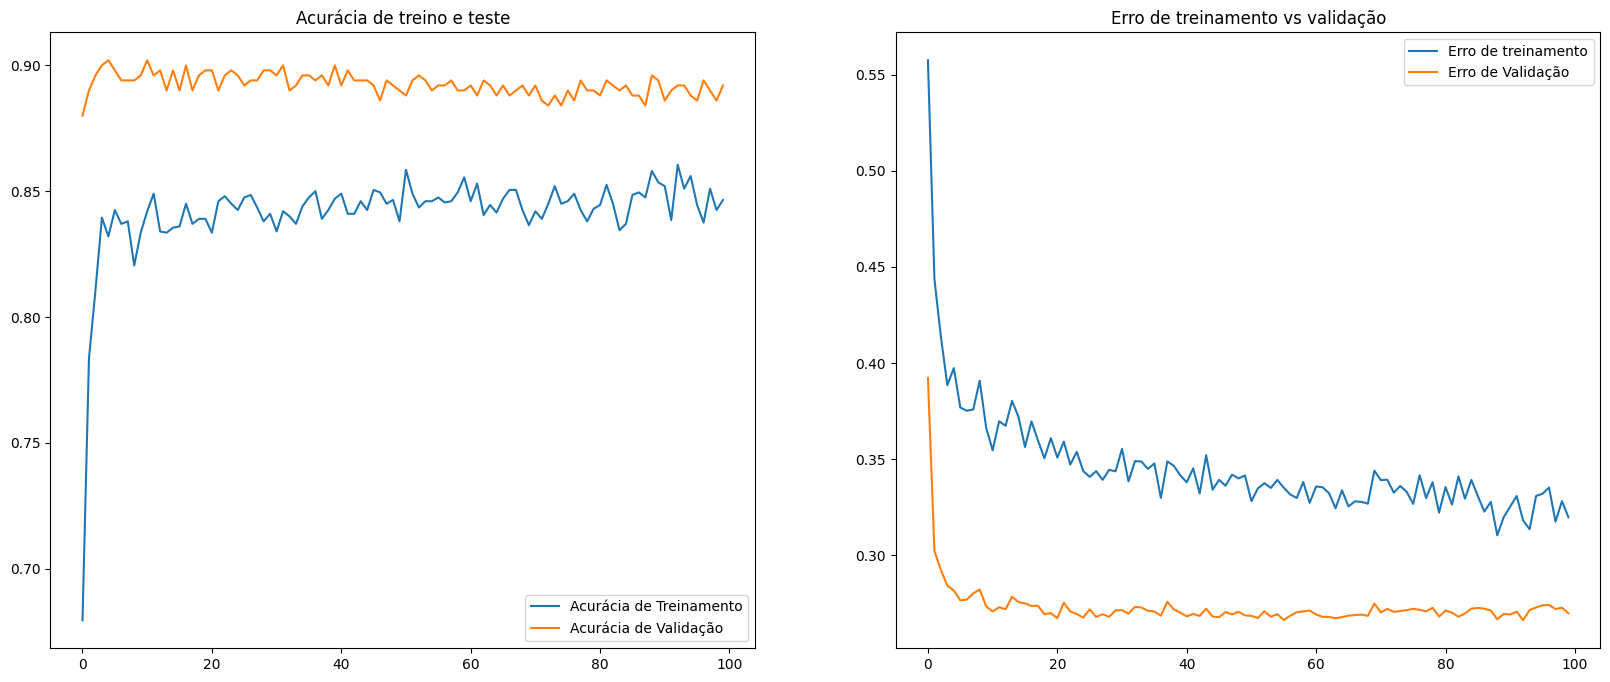

In [22]:
# Avaliando o modelo de classificação
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']



loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch)

# Plot Acurácia
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treinamento')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de treino e teste')


# Plot Erro de treinamento
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Erro de treinamento')
plt.plot(epochs_range, val_loss, label='Erro de Validação')
plt.legend(loc='upper right')
plt.title('Erro de treinamento vs validação')
plt.show()

In [23]:
#Predição do modelo de classificação para os dados de teste
y_pred = model.predict(X_test)
y_pred_class = [round(x[0]) for x in y_pred]
y_test_class = y_test

#Inicia um loop que percorre cada linha do dataset de teste e compara com a predição do modelo
class_names = []
for i in y.unique():
    class_names.append(le.inverse_transform([i])[0])

#Imprime um relatório de classificação
print(classification_report(y_test_class, y_pred_class, target_names=class_names))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
                   precision    recall  f1-score   support

(B) Ürgüp Sivrisi       0.88      0.91      0.90       257
  (A) Çerçevelik        0.91      0.87      0.89       243

         accuracy                           0.89       500
        macro avg       0.89      0.89      0.89       500
     weighted avg       0.89      0.89      0.89       500



<Axes: >

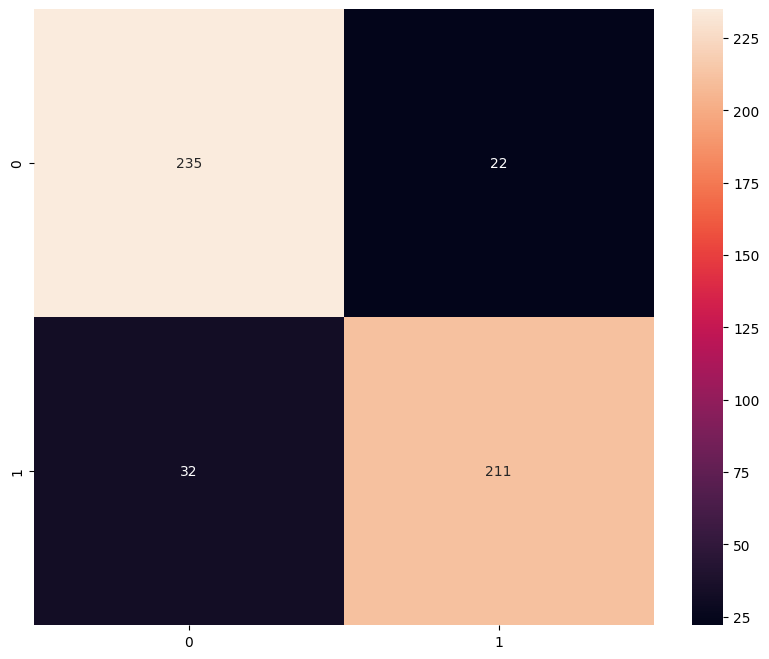

In [26]:
#Criando e imprimindo uma matriz de confusão
cm = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g')


In [27]:
#Salvando o modelo de classificação
model.save('modelo_sementes_abobora.h5')
print('Modelo salvo com sucesso!')

Modelo salvo com sucesso!
